# Implementation of RandomForest Classifier Model
## This is model is implemented with a dummy artificial dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## EDA

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


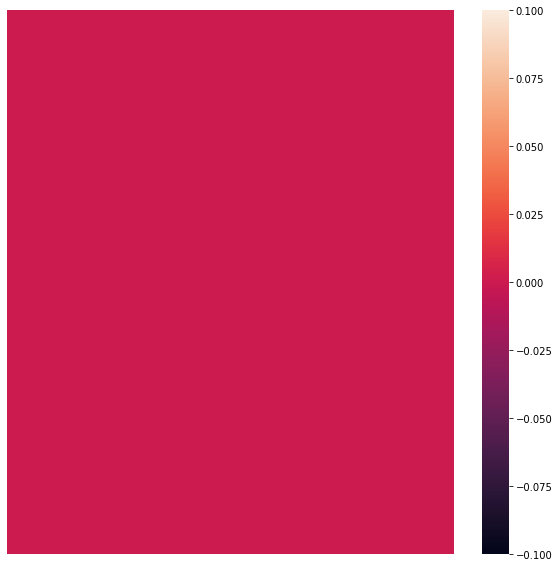

In [5]:
plt.figure(figsize=([10,10]))
sns.heatmap(dataset.isnull(),xticklabels=False,yticklabels=False)

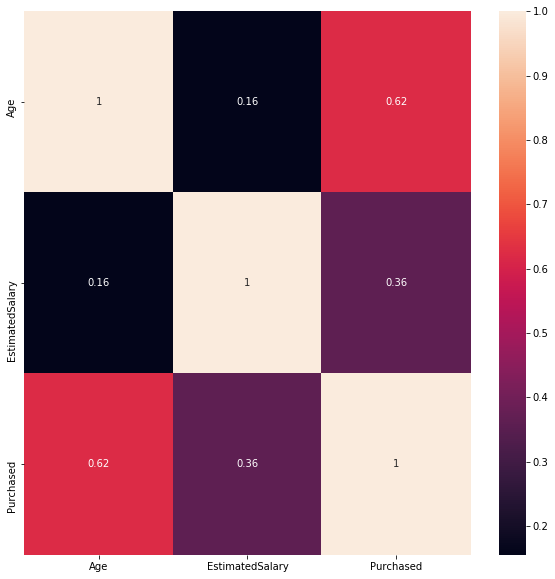

In [6]:
plt.figure(figsize=([10,10]))
sns.heatmap(dataset.corr(),xticklabels=True,yticklabels=True,annot=True)

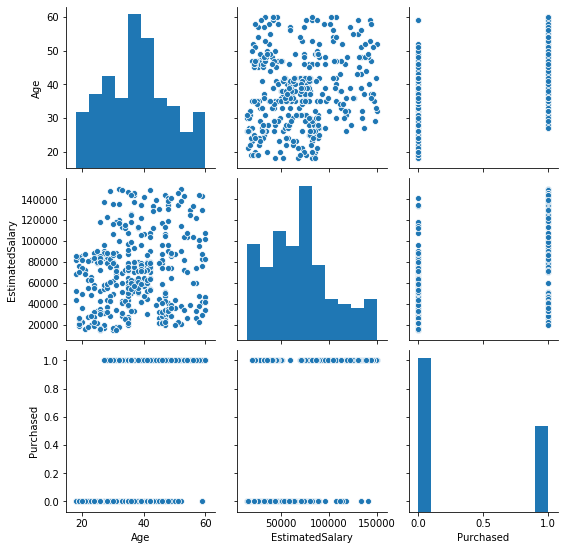

In [7]:
sns.pairplot(data=dataset)

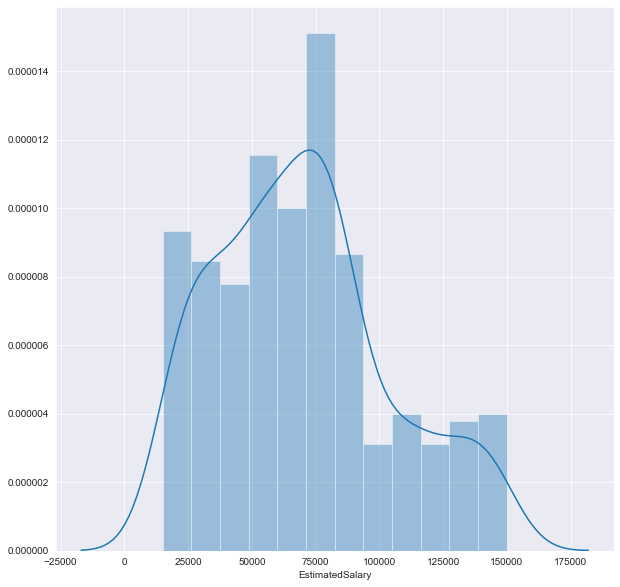

In [8]:
plt.figure(figsize=([10,10]))
sns.set_style('darkgrid')
sns.distplot(dataset['EstimatedSalary'])

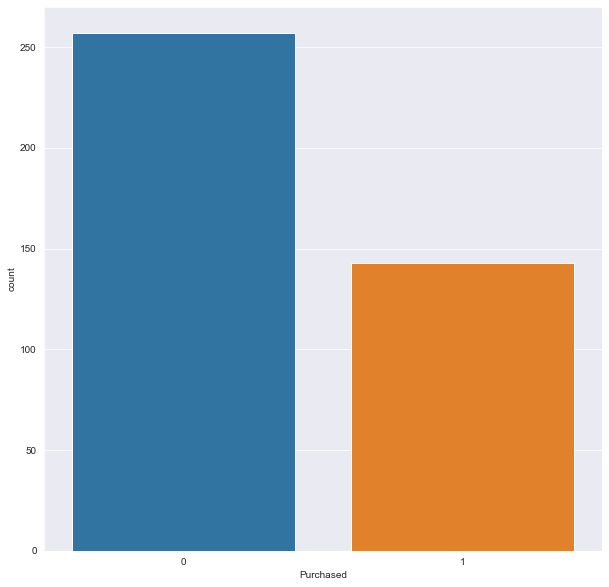

In [9]:
plt.figure(figsize=([10,10]))
sns.countplot(x='Purchased',data=dataset)

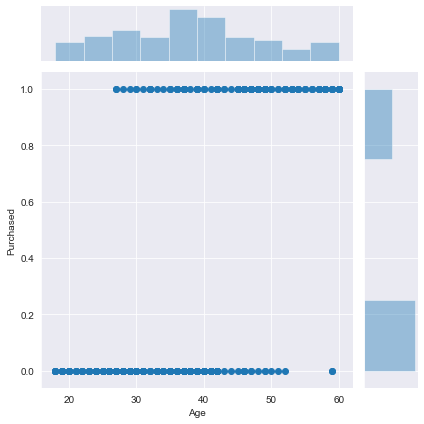

In [10]:
sns.jointplot(x='Age',y='Purchased', data=dataset)

## Model building

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X,y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000],
        [    45,  22000],
        [    47,  49000],
        [    48,  41000],
        [    45,  22000],
        [    46,  23000],
        [    47,  20000],
        [    49,  28000],
        [    47,  30000],
        [    29,  43000],
        [    31,  18000],
        [    31,  74000],
        [    27, 137000],
        [    21,  16000],
        [    28,  44000],
        [    27,  90000],
        [    35,  27000],
        [    33,  28000],
        [    30,  49000],
        [   

In [13]:
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scale = StandardScaler()

In [16]:
X_Train = scale.fit_transform(X_Train)
X_Test = scale.transform(X_Test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier(n_estimators=10)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
model.fit(X_Train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
predictions = model.predict(X_Test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Model Evaluations

In [21]:
print(model.score(X_Test,y_test))

0.9


In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
print('Confusion matrix')
print(confusion_matrix(y_test,predictions))

Confusion matrix
[[72  8]
 [ 4 36]]


In [24]:
print('Classification Report')
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        80
           1       0.82      0.90      0.86        40

    accuracy                           0.90       120
   macro avg       0.88      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120



In [25]:
print(f'Model accuracy score is {accuracy_score(y_test,predictions)}')

Model accuracy score is 0.9


In [26]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [27]:
df1 = pd.DataFrame(data=predictions, columns=['Predictions'])
df2 = pd.DataFrame(data=y_test, columns=['Actual'])

pd.concat([df1,df2],axis=1)

,Predictions,Actual
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
115,0,0
116,0,0
117,0,0
118,0,0


In [28]:
np.concatenate((y_test.reshape(len(y_test),1),predictions.reshape(len(y_test),1)),axis=1)

array([[0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0,

[0.9, 0.9083333333333333, 0.9166666666666666, 0.9166666666666666, 0.8916666666666667, 0.8833333333333333, 0.9, 0.8833333333333333, 0.9166666666666666, 0.8833333333333333, 0.9083333333333333, 0.9166666666666666, 0.8916666666666667, 0.9083333333333333, 0.9166666666666666, 0.8916666666666667, 0.9, 0.8833333333333333, 0.9083333333333333, 0.9166666666666666, 0.925, 0.925, 0.9166666666666666, 0.9166666666666666, 0.9083333333333333, 0.9, 0.9, 0.8916666666666667, 0.9, 0.8833333333333333, 0.9, 0.9083333333333333, 0.9166666666666666, 0.8916666666666667, 0.925, 0.9083333333333333, 0.9, 0.9, 0.8916666666666667, 0.8916666666666667]


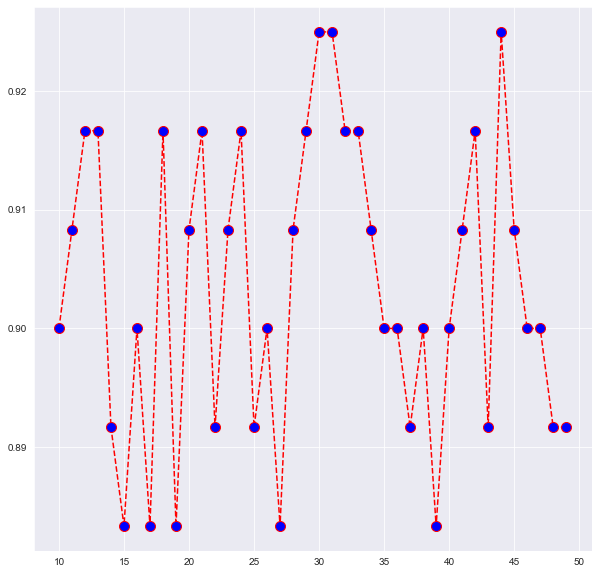

In [29]:
plt.figure(figsize=(10,10))
ensemble_accuracy = []
for k in range(10,50):
    model = RandomForestClassifier(n_estimators=k)
    model.fit(X_Train,y_train)
    predict = model.predict(X_Test)
    ensemble_accuracy.append(accuracy_score(y_test,predict))
print(ensemble_accuracy)

plt.plot(range(10,50),ensemble_accuracy, c='red',ls='dashed',marker='o',markerfacecolor='blue',markersize=10)

## K-fold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cv = cross_val_score(model,X_Train,y_train,cv=10)

In [32]:
cv

array([0.78571429, 0.85714286, 0.85714286, 0.85714286, 0.89285714,
       0.92857143, 0.89285714, 0.82142857, 0.89285714, 0.78571429])

In [33]:
print(f'mean CV score :{cv.mean()},std deviation of CV score {cv.std()*100}')

mean CV score :0.8571428571428571,std deviation of CV score 4.517539514526259


In [34]:
print(f'Model accuracy score is {accuracy_score(y_test,predictions)}')

Model accuracy score is 0.9


## Visualization of Training set 
#### Execution of visualization part is commented due to the memory constraints of workstation

In [35]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = scale.inverse_transform(X_Train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, model.predict(scale.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualization of Test set 

In [36]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = scale.inverse_transform(X_Test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, model.predict(scale.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()